In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Load Image
def read_file(filename):
  img=cv2.imread(filename)
  #When we read file using imread they are usually read into BGR format ,so we have to convert it into RGB format so COLOR_BGR2RGB is used.
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.show()
  return img

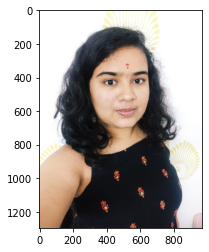

In [ ]:
filename="/content/WhatsApp Image 2021-09-08 at 7.46.13 PM.jpeg"
img=read_file(filename)
org_img=np.copy(img)

In [ ]:
#Create edge mask
"""
Input:-Input  Image
Output:-Edges of Image
"""
def edge_mask(img,line_size,blur_value):
  gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  gray_blur=cv2.medianBlur(gray,blur_value)

  edges=cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,line_size,blur_value)
  return edges


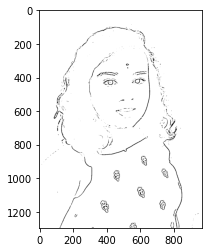

In [ ]:
line_size,blur_value=7,7
#You can give any size,it doesn't matter
edges=edge_mask(img,line_size,blur_value)
plt.imshow(edges,cmap="gray")
plt.show()

In [ ]:
##Reduce a color palette
#Means we are reducing the number of colors ,from the image 
def color_quantization(img,k):
  #Transform the image
  data=np.float32(img).reshape((-1,3))
  #Determine Criteria
  criteria=(cv2.TERM_CRITERIA_EPS+cv2.TermCriteria_MAX_ITER,20,0.001)
  ##Implementing K-Means
  ret,label,center=cv2.kmeans(data,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
  center=np.uint8(center)
  result=center[label.flatten()]
  result=result.reshape(img.shape)
  return result



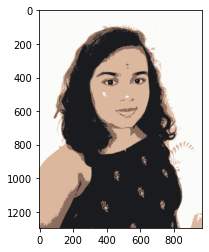

In [ ]:
img=color_quantization(img, k=4)
plt.imshow(img)
plt.show()  

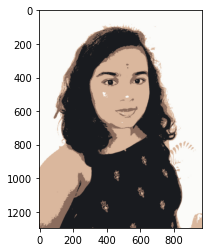

In [ ]:
#Reducing the noise
blurred=cv2.bilateralFilter(img,d=5,sigmaColor=200,sigmaSpace=200)
plt.imshow(blurred)
plt.show() 

In [ ]:
def cartoon():
  c=cv2.bitwise_and(blurred,blurred,mask=edges)
  plt.imshow(org_img)
  plt.title("Original Image")
  plt.show()

  plt.imshow(c)
  plt.title("Cartoonified Image")
  plt.show()
  



  

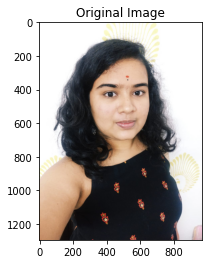

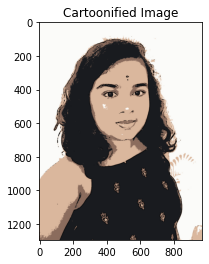

In [ ]:
cartoon()